In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
id2coord = dict(zip(train_data['ID'], list(zip(train_data['LAT'], train_data['LON']))))
id2coord, len(id2coord)

({'PD01': (45.60158469, 11.90355081),
  'PD04': (45.37100479, 11.84082978),
  'RO01': (45.04582512, 12.06086934),
  'RO02': (45.10407489, 11.55324086),
  'RO03': (45.03875842, 11.79015164),
  'TV01': (45.88973369, 12.30712448),
  'TV02': (45.67172072, 12.23780698),
  'VE01': (45.6290925, 12.59068235),
  'VE02': (45.49961805, 12.26124917),
  'VE03': (45.42842368, 12.3129303),
  'VI02': (45.75927327, 11.73585212),
  'VI03': (45.7135591, 11.3676575),
  'VI04': (45.55956112, 11.53865377),
  'VR02': (45.18262647, 11.31051146),
  'VR04': (45.43340536, 11.03056877),
  'X10019': (45.69042908, 9.484260928),
  'X10038': (45.61924378, 8.756970445),
  'X10079': (45.41277169, 10.68335734),
  'X10097': (45.04650154, 11.18093582),
  'X10167': (45.01687782, 11.07609463),
  'X10279': (45.47899606, 9.235491038),
  'X10326': (45.28193561, 8.754334595),
  'X10331': (45.30360787, 8.84480461),
  'X10452': (45.3027835, 9.495273697),
  'X10458': (45.23349364, 9.666250375),
  'X10507': (45.64970251, 9.60122333

In [4]:
train_data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [5]:
print(f"Train size before dropping empty GT NO2: {len(train_data)}")

Train size before dropping empty GT NO2: 86584


In [6]:
train_data.dropna(subset = ['GT_NO2'], inplace=True)
print(f"Train size after dropping empty GT NO2: {len(train_data)}")

Train size after dropping empty GT NO2: 82051


In [7]:
print("Distribution of locations after dropping")

train_data.ID.value_counts()

Distribution of locations after dropping


ID
VI04      1093
RO03      1090
X5557     1090
VI03      1088
X5611     1088
          ... 
X5545      968
X17286     936
X9877      906
X20491     306
X20495     298
Name: count, Length: 79, dtype: int64

In [8]:
train_data = train_data[train_data['ID'] == 'VI04']
train_data.head(10)

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
12,ID_PHU2ZY,1/1/19,VI04,45.559561,11.538654,0.000000,NaN,-0.204458,0.275040,0.000024,0.000122,NaN,14443.86329,46.0
91,ID_B0PDIV,2/1/19,VI04,45.559561,11.538654,0.000000,283.14,-0.656454,0.014145,0.000033,0.000067,0.000034,20801.51360,28.0
170,ID_F8CEFC,3/1/19,VI04,45.559561,11.538654,0.000000,280.00,-0.766688,0.000000,0.000028,0.000173,0.000145,22301.16373,64.0
249,ID_VXLE0S,4/1/19,VI04,45.559561,11.538654,0.000000,NaN,-1.025043,0.147613,0.000021,0.000180,NaN,19355.15746,70.0
328,ID_ZM4ZBZ,5/1/19,VI04,45.559561,11.538654,0.000000,NaN,-1.189592,0.173797,0.000017,0.000208,NaN,16737.22224,66.0
407,ID_569ER3,6/1/19,VI04,45.559561,11.538654,0.000000,278.14,-0.524463,0.047737,0.000022,0.000199,0.000162,16738.59089,68.0
486,ID_L387L2,7/1/19,VI04,45.559561,11.538654,0.000000,NaN,-0.234102,0.442373,0.000025,0.000113,NaN,16747.70325,66.0
565,ID_WDSYAM,8/1/19,VI04,45.559561,11.538654,5.815856,NaN,-1.104113,0.411897,0.000026,0.000309,NaN,16730.55293,55.0
644,ID_3TVR6J,9/1/19,VI04,45.559561,11.538654,2.907928,NaN,-1.262312,0.285822,0.000032,0.000329,NaN,24340.75950,53.0
723,ID_7DPNA3,10/1/19,VI04,45.559561,11.538654,0.000000,NaN,-0.785390,0.371029,0.000031,0.000153,NaN,22235.35439,74.0


In [9]:
filtered_train_data = train_data[['Date', 'GT_NO2']]
filtered_train_data

,Date,GT_NO2
12,1/1/19,46.0
91,2/1/19,28.0
170,3/1/19,64.0
249,4/1/19,70.0
328,5/1/19,66.0
...,...,...
86201,27-12-21,39.0
86280,28-12-21,36.0
86359,29-12-21,38.0
86438,30-12-21,33.0


In [10]:
# First, try to convert using the first known format
filtered_train_data['Date'] = pd.to_datetime(filtered_train_data['Date'], errors='raise', dayfirst=True)

# Then, for the rows where the conversion failed (NaT values), try the second format
# filtered_train_data['Date'] = pd.to_datetime(filtered_train_data['Date'].fillna(pd.to_datetime(filtered_train_data['Date'], format='%d-%m-%y', errors='coerce')))

# filtered_train_data['Date']
filtered_train_data.set_index('Date', inplace=True)

/var/folders/_j/84scrmf1021crzjg0bkcrtvh0000gn/T/ipykernel_11682/528582540.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_train_data['Date'] = pd.to_datetime(filtered_train_data['Date'], errors='raise', dayfirst=True)
/var/folders/_j/84scrmf1021crzjg0bkcrtvh0000gn/T/ipykernel_11682/528582540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_data['Date'] = pd.to_datetime(filtered_train_data['Date'], errors='raise', dayfirst=True)


In [11]:
filtered_train_data

,GT_NO2
Date,
2019-01-01,46.0
2019-01-02,28.0
2019-01-03,64.0
2019-01-04,70.0
2019-01-05,66.0
...,...
2021-12-27,39.0
2021-12-28,36.0
2021-12-29,38.0


In [12]:
filtered_train_data.index.dtype

dtype('<M8[ns]')

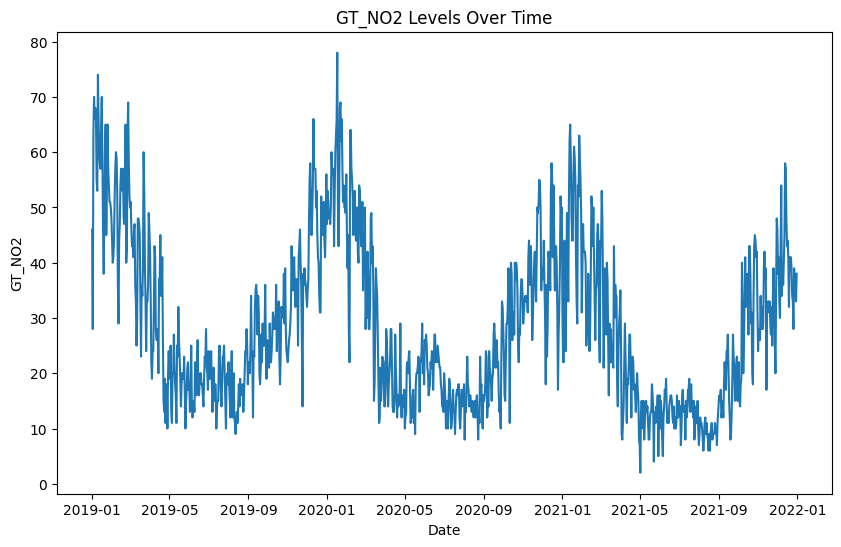

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_train_data.index, filtered_train_data['GT_NO2'])
plt.title('GT_NO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('GT_NO2')
plt.show()

/Users/gaurxvreddy/CSCI566/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
14:22:21 - cmdstanpy - INFO - Chain [1] start processing
14:22:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 4.270620677666326
Root Mean Squared Error (RMSE): 5.884088107374442


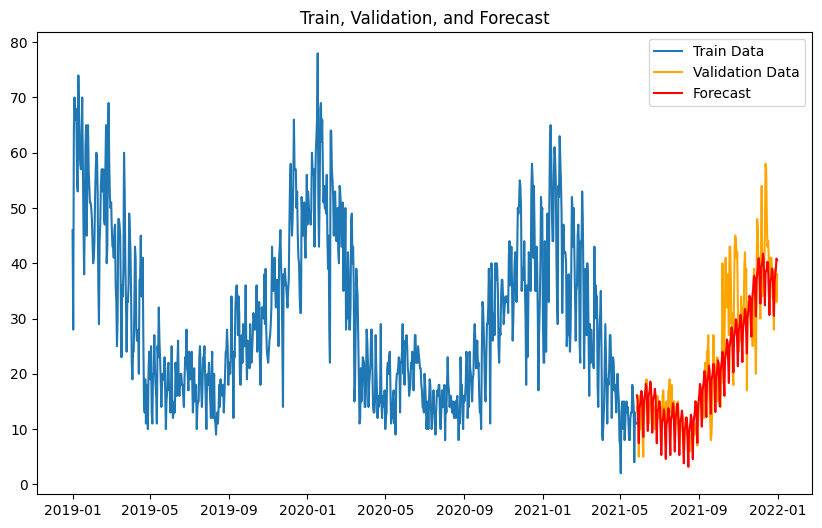

In [17]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.DataFrame({'ds': filtered_train_data.index, 'y': filtered_train_data['GT_NO2'].values})

split_index = int(len(df) * 0.8)
train_data = df.iloc[:split_index]
val_data = df.iloc[split_index:]

model = Prophet()
model.fit(train_data)

# 4. Make predictions for the validation period
# Create future dataframe that includes the validation period
future = model.make_future_dataframe(periods=len(val_data), freq='D')
forecast = model.predict(future)

# Extract predictions for the validation set
val_forecast = forecast[['ds', 'yhat']].iloc[split_index:]

# 5. Evaluate model performance
# Calculate metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(val_data['y'], val_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(val_data['y'], val_forecast['yhat']))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 6. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train Data')
plt.plot(val_data['ds'], val_data['y'], label='Validation Data', color='orange')
plt.plot(val_forecast['ds'], val_forecast['yhat'], label='Forecast', color='red')
plt.title('Train, Validation, and Forecast')
plt.legend()
plt.show()